# Real Estate Clean up

This is a real dataset, and it was downloaded using web scraping techniques. The data contains registers from **Fotocasa** which is one of the most popular real estate websites in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and in no case were economic returns obtained from it.

It contains thousands of data from real houses published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive house in the entire dataset?

Let's start with precisely that question... Good luck!

#### Exercise 00. Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)

In [1]:
import pandas as pd 

ds = pd.read_csv('assets/real_estate.csv', sep=';')
ds.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [2]:
ds.transpose()

,0,1,2,3,4,5,6,7,8,9,...,15325,15326,15327,15328,15329,15330,15331,15332,15333,15334
Unnamed: 0,1,2,3,4,5,6,7,8,9,10,...,15326,15327,15328,15329,15330,15331,15332,15333,15334,15335
id_realEstates,153771986,153867863,153430440,152776331,153180188,153934794,153848236,153482331,153885351,153215459,...,153901467,153901401,153901411,153901441,153901392,153901377,150394373,153901397,152607440,153901356
isNew,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
realEstate_name,ferrari 57 inmobiliaria,tecnocasa fuenlabrada ferrocarril,look find boadilla,tecnocasa fuenlabrada ferrocarril,ferrari 57 inmobiliaria,expimad,expimad,expimad,expimad,modesta,...,montehogar 68,nieves,gilmar villalba,servivienda api,pqcentro,infocasa consulting,inmobiliaria pulpon,tecnocasa torrelodones,inmobiliaria pulpon,infocasa consulting
phone_realEstate,912177526.0,916358736.0,916350408.0,916358736.0,912177526.0,912780412.0,912780412.0,912780412.0,912780412.0,NaN,...,911790675.0,NaN,912788041.0,911223996.0,912665783.0,911360461.0,912788039.0,912780348.0,912788039.0,911360461.0
url_inmueble,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...,https://www.fotocasa.es/es/comprar/vivienda/ma...
rooms,3.0,3.0,2.0,3.0,2.0,2.0,3.0,2.0,4.0,4.0,...,2.0,3.0,3.0,2.0,2.0,2.0,3.0,4.0,3.0,3.0
bathrooms,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,3.0,2.0,...,2.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0
surface,103.0,NaN,99.0,86.0,106.0,70.0,145.0,95.0,277.0,129.0,...,99.0,80.0,85.0,NaN,122.0,96.0,150.0,175.0,101.0,152.0
price,195000,89000,390000,89000,172000,315000,430000,275000,445000,350000,...,215000,184000,150000,229000,264500,259470,165000,495000,195000,765000


In [3]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [4]:
ds.sort_values(by='price', axis=0,ascending=False, inplace=True)
print(ds['price'])

13110    8500000
7689     8000000
11862    8000000
12147    7900000
403      7800000
          ...   
3201           0
8962           0
3036           0
2750           0
366            0
Name: price, Length: 15335, dtype: int64


#### Exercise 01. Which is the most expensive house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address General Street Nº5 is the most expensive and its price is 5000000 USD`

In [5]:
# TODO
ds.sort_values(by='price', axis=0, ascending=False, inplace=True)

expensive_house_price = ds.iloc[0]['price']
expensive_house_address = ds.iloc[0] ['address'] 
print(f'The house with address {expensive_house_address} is the most expensive and its price is {expensive_house_price} USD')


The house with address El Escorial is the most expensive and its price is 8500000 USD


#### Exercise 02. Which is the cheapest house in the dataset? (★☆☆)

Print the address and the price of the selected house. For example:

`The house with address Concrete Street Nº1 is the cheapest and its price is 12000 USD`

In [6]:
# TODO
cheapest_house_price = ds.iloc[-1]['price']
cheapest_house_address = ds.iloc[-1] ['address'] 
print(f'The house with address {cheapest_house_address} is the cheapest and its price is {cheapest_house_price} USD')

The house with address Parla is the cheapest and its price is 0 USD


#### Exercise 03. Which is the biggest and the smallest house in the dataset? (★☆☆)

Print both the address and the surface of the selected houses. For example:

`The biggest house is located on Yukka Street Nº10 and its surface is 5000 meters`

`The smallest house is located on County Road 1 N and its surface is 200 meters`

In [10]:
# TODO
 
ds.sort_values(by='surface', axis=0, ascending=False, inplace=True)
#Biggest house
#biggest_house_area = ds.iloc[0]['surface']
biggest_house_area = ds[ds['surface'].notna()].iloc[0]['surface']
#biggest_house_address = ds.iloc[0]['address']
biggest_house_address = ds[ds['surface'].notna()].iloc[0]['address']
print(f'The biggest house is located on {biggest_house_address} and its surface is {biggest_house_area} meters')
#Smallest house 
#smallest_house_area = ds.iloc[-1]['surface']
#smallest_house_address = ds.iloc[-1]['address']
#print(f'The smallest house is located on {smallest_house_address} and its surface is {smallest_house_area} meters')
#Remove na/null  
smallest_house_area = ds[ds['surface'].notna()].iloc[-1]['surface']
smallest_house_address = ds[ds['surface'].notna()].iloc[-1]['address']
print(f'The smallest house is located on {smallest_house_address} and its surface is {smallest_house_area} meters')

The biggest house is located on Sevilla la Nueva and its surface is 249000.0 meters
The smallest house is located on Calle Amparo,  Madrid Capital and its surface is 15.0 meters


#### Exercise 04. How many populations (level5 column) the dataset contains? (★☆☆)

Print the names of the populations with a comma as a separator. For example:

`> print(populations)`

`population1, population2, population3, ...`

In [15]:
# TODO
populations = ds['level5'].unique()
number = len(populations)
print(f'The level5 column has {number} populations.')
print(populations)

The level5 column has 168 populations.
['Sevilla la Nueva' 'Arroyomolinos (Madrid)' 'San Agustín del Guadalix'
 'Navarredonda' 'Galapagar' 'Cabanillas de la Sierra' 'El Molar (Madrid)'
 'Miraflores de la Sierra' 'Alcobendas' ' Madrid Capital'
 'Cubas de la Sagra' 'El Escorial' 'San Sebastián de los Reyes' 'Parla'
 'Las Rozas de Madrid' 'Pozuelo de Alarcón' 'Algete' 'Carabaña'
 'Manzanares El Real' 'Boadilla del Monte' 'Valdemorillo' 'Navalafuente'
 'Torrelodones' 'Tielmes' 'Villaviciosa de Odón' 'Nuevo Baztán'
 'Colmenar de Oreja' 'Camarma de Esteruelas' 'Collado Villalba'
 'Villanueva de la Cañada' 'Hoyo de Manzanares' 'Guadarrama'
 'San Martín de la Vega' 'Villalbilla' 'Colmenar Viejo' 'El Álamo'
 'Alcorcón' 'Pozuelo del Rey' 'Colmenarejo' 'Griñón'
 'Cadalso de los Vidrios' 'Paracuellos de Jarama' 'Morata de Tajuña'
 'Los Molinos' 'Valdetorres de Jarama' 'Getafe' 'Meco'
 'El Boalo - Cerceda – Mataelpino' 'Rivas-vaciamadrid' 'Villa del Prado'
 'Villanueva del Pardillo' 'Majadahonda' '

#### Exercise 05. Does the dataset contain NAs? (★☆☆)

Print a boolean value (`True` or `False`) followed by the rows/cols that contains NAs.

In [9]:
# TODO
null_dataset=ds.isnull().values.any()
null_columns=ds.isnull().values.any()
null_rows=ds[ds.isnull().any(axis=1)]


print(f'Does the dataset contains NA values: {null_dataset}')
print(f'Columns containing NA values: {null_columns}')
print('Rows containing NA values:')
null_rows.head()

Does the dataset contains NA values: True
Columns containing NA values: True
Rows containing NA values:


,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
6794,6795,153936192,False,habitarium inmobiliaria,916357732.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,249000.0,289000,...,0,0,0,0,0,0,"40,34633","-4,02174",NaN,NaN
12676,12677,153942565,False,montse,NaN,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,3.0,66666.0,389000,...,0,0,0,0,0,1,"40,27977","-3,92413",NaN,NaN
14852,14853,152249752,False,deplace,910750918.0,https://www.fotocasa.es/es/comprar/vivienda/la...,NaN,NaN,16853.0,90000,...,0,0,0,0,0,0,"40,6912092","-3,608836",NaN,NaN
8537,8538,142907825,False,remax jumbo,910758029.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,30.0,20.0,5504.0,790000,...,0,0,0,0,0,0,"40,98879","-3,70811",NaN,NaN
1198,1199,142601805,False,sosdivar,914890914.0,https://www.fotocasa.es/es/comprar/vivienda/la...,6.0,3.0,5083.0,825000,...,0,0,0,0,0,1,"40,55249","-3,98827",NaN,NaN


#### Exercise 06. Delete the NAs of the dataset, if applicable (★★☆)

Print a comparison between the dimensions of the original DataFrame versus the DataFrame after the deletions.

In [ ]:
ds.drop(['level4', 'level6', 'level8', 'zipCode', 'customZone'], axis= 1, inplace=True)
ds.dropna(inplace=True)
ds.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11025 entries, 1198 to 498
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        11025 non-null  int64  
 1   id_realEstates    11025 non-null  int64  
 2   isNew             11025 non-null  bool   
 3   realEstate_name   11025 non-null  object 
 4   phone_realEstate  11025 non-null  float64
 5   url_inmueble      11025 non-null  object 
 6   rooms             11025 non-null  float64
 7   bathrooms         11025 non-null  float64
 8   surface           11025 non-null  float64
 9   price             11025 non-null  int64  
 10  date              11025 non-null  object 
 11  description       11025 non-null  object 
 12  address           11025 non-null  object 
 13  country           11025 non-null  object 
 14  level1            11025 non-null  object 
 15  level2            11025 non-null  object 
 16  level3            11025 non-null  object 
 1

#### Exercise 07. Which is the mean of prices in the population (level5 column) of "Arroyomolinos (Madrid)"? (★★☆)

Print the obtained value.

In [36]:
# TODO

population ='Arroyomolinos (Madrid)'
subset_df = ds[ds['level5'] == population]
price_mean = subset_df['price'].mean()


print(f'Average price in {population} is ${price_mean:.2f}')

Average price in Arroyomolinos (Madrid) is $298780.22


#### Exercise 08. Plot the histogram of prices for the population (level5 column) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

Print the histogram of the prices and write in the Markdown cell a brief analysis about the plot.

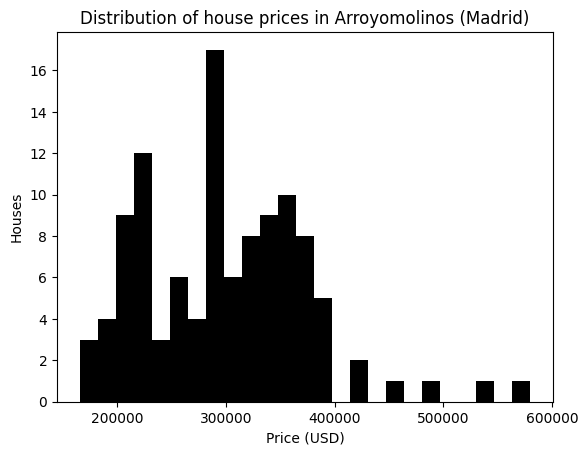

In [13]:
# TODO: Code
import matplotlib.pyplot as plt

plt.title(f'Distribution of house prices in {population}')
plt.hist(subset_df['price'], bins=25, color='black')
plt.xlabel('Price (USD)')
plt.ylabel('Houses')
plt.show()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

The distribution is irregular. Most house price ranges are between 100k and 400K USD. There are very few house in high end price ranges between 400K to 600K USD. Arround a mean of 300K price range, there are many 300K USD houses.   

#### Exercise 09. Are the average prices of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about them.

In [14]:
# TODO
from scipy.stats import ttest_ind

population1 ='Valdemorillo'
vald_df = ds[ds['level5'] == population1]
vald_mean = vald_df['price'].mean()

population2 = 'Galapagar'
galp_df = ds[ds['level5'] == population2]
galp_mean = galp_df['price'].mean()

print(f'Average price in {population1} is ${vald_mean:.2f}')
print(f'Average price in {population2} is ${galp_mean:.2f}')

t_stat, p_value = ttest_ind(vald_df['price'], galp_df['price'])
print('p-value:', p_value)

Average price in Valdemorillo is $384269.57
Average price in Galapagar is $381106.70
p-value: 0.9335268967311312


using t-test statistical test, the p value is calculated to be 0.93. THe Large p-value means there is insufficient evidence to reject the null hypothesis, meaning the means are not significantly different

#### Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)

Print both average prices and then write a conclusion about it.

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [15]:
# TODO

valdemorillo_df=ds[ds['level5'] == 'Valdemorillo'].copy()
galapagar_df=ds[ds['level5'] == 'Galapagar'].copy()

valdemorillo_df['pps']=valdemorillo_df['price']/valdemorillo_df['surface']
galapagar_df['pps']=galapagar_df['price']/galapagar_df['surface']

# Print the mean for both
print(f"Valdemorillo mean: {valdemorillo_df['pps'].mean():.2f} USD per square meter")
print(f"Galapagar mean: {galapagar_df['pps'].mean():.2f} USD per square meter")

# Conduct a t-test on the prices
t_statistic, p_value = ttest_ind(valdemorillo_df['pps'], galapagar_df['pps'])
print('\np-value:', p_value)


Valdemorillo mean: 1321.77 USD per square meter
Galapagar mean: 1566.52 USD per square meter

p-value: 0.010206178702749933


The small p-value (typically < 0.05) indicates to reject the null hypothesis, meaning there is significant evidence that the means are different between Valdemorillo and Galapagar populations

#### Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)

Hint: You can make a `scatter plot`, then write a conclusion about it.

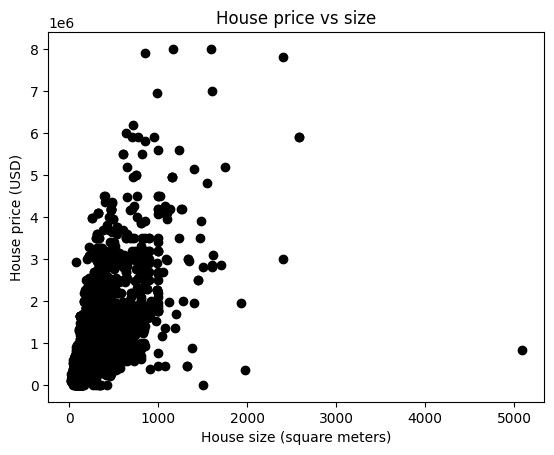

In [16]:
# TODO: 
plt.title('House price vs size')
plt.scatter(ds['surface'], ds['price'], color='black')
plt.xlabel('House size (square meters)')
plt.ylabel('House price (USD)')
plt.show()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

The house prices are positively correlated to house sizes. But the corelation is not aboslute, meaning the bigger houses cost less compared to a small house and vice versa! 

#### Exercise 12. How many real estate agencies does the dataset contain? (★★☆)

Print the obtained value.

In [17]:
# TODO
real_estate_agencies = ds['realEstate_name'].unique()
number = len(real_estate_agencies)
print(f'The dataset contain {number} real estate agencies.')
print(real_estate_agencies)

The dataset contain 1337 real estate agencies.
['ferrari 57 inmobiliaria' 'look find boadilla'
 'tecnocasa fuenlabrada ferrocarril' ...
 'redpiso villaverde bajo san cristobal' 'gestion comercial'
 'montehogar 68']


#### Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)

Print both the population and the number of houses.

In [18]:
# TODO
ds['level5'].value_counts()

level5
 Madrid Capital               5658
Alcalá de Henares              474
Las Rozas de Madrid            360
Móstoles                       259
Parla                          248
Alcobendas                     243
Boadilla del Monte             242
Getafe                         220
Torrejón de Ardoz              216
Pozuelo de Alarcón             207
Valdemoro                      201
Fuenlabrada                    182
Collado Villalba               179
Leganés                        173
Alcorcón                       154
Villaviciosa de Odón           143
Coslada                        140
San Sebastián de los Reyes     136
Majadahonda                    133
Arganda del Rey                130
Aranjuez                       127
Pinto                          126
Arroyomolinos (Madrid)         110
Rivas-vaciamadrid              107
Navalcarnero                    84
Torrelodones                    78
San Lorenzo de El Escorial      75
Moralzarzal                     74
El Escorial  

#### Exercise 14. Now let's work with the "south belt" of Madrid. Make a subset of the original DataFrame that contains the following populations (level5 column): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Hint: Filter the original DataFrame using the column `level5` and the function `isin`.

In [19]:
# TODO
south_belt_list=["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

subset_df=ds[ds['level5'].isin(south_belt_list)].copy()

subset_df=subset_df[subset_df['price'] != 0]
subset_df=subset_df[subset_df['surface'] != 0]
subset_df.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level2Id,level3Id,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624"
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,0,0,0,"40,31933","-3,77574"
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,0,0,0,"40,3313411","-3,8313868"
161,162,153440116,False,prolucisa,916350416.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,123.0,239500,...,0,0,0,0,0,0,0,0,"40,2744807718156","-3,79192471504211"
169,170,153920011,False,grupo tizona,911226046.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,6.0,2.0,195.0,290000,...,0,0,0,0,0,0,0,0,"40,31111","-3,73066"


In [20]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 718 entries, 3 to 15325
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        718 non-null    int64  
 1   id_realEstates    718 non-null    int64  
 2   isNew             718 non-null    bool   
 3   realEstate_name   718 non-null    object 
 4   phone_realEstate  718 non-null    float64
 5   url_inmueble      718 non-null    object 
 6   rooms             718 non-null    float64
 7   bathrooms         718 non-null    float64
 8   surface           718 non-null    float64
 9   price             718 non-null    int64  
 10  date              718 non-null    object 
 11  description       718 non-null    object 
 12  address           718 non-null    object 
 13  country           718 non-null    object 
 14  level1            718 non-null    object 
 15  level2            718 non-null    object 
 16  level3            718 non-null    object 
 17  

#### Exercise 15. Make a bar plot of the median of the prices and explain what you observe (you must use the subset obtained in Exercise 14) (★★★)

Print the bar of the median of the prices and write in the Markdown cell a brief analysis about the plot.

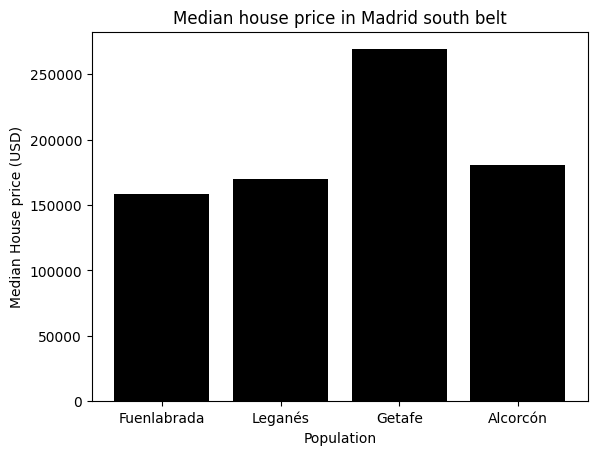

In [21]:
# TODO: Code

medians=subset_df.groupby('level5')[['price']].median()

plt.title('Median house price in Madrid south belt')

for i, population in enumerate(south_belt_list):

    plt.bar(i,medians.loc[population].values[0], color="black")

plt.xlabel('Population')
plt.ylabel('Median House price (USD)')
plt.xticks(range(len(south_belt_list)), south_belt_list)
plt.show()

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 16. Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (you must use the subset obtained in Exercise 14) (★★★)

Print both values for each variable.

In [22]:
# TODO
independent_vars=['price', 'rooms', 'surface', 'bathrooms']

for independent_var in independent_vars:
    print(f'{independent_var} mean: {subset_df[independent_var].mean():.1f}')
    print(f'{independent_var} variance: {subset_df[independent_var].var():.1f}\n')

price mean: 223970.2
price variance: 14770653355.8

rooms mean: 3.0
rooms variance: 0.7

surface mean: 109.9
surface variance: 4271.1

bathrooms mean: 1.6
bathrooms variance: 0.6



#### Exercise 17. What is the most expensive house in each population? You must use the subset obtained in Exercise 14 (★★☆)

Print both the address and the price of the selected house of each population. You can print a DataFrame or a single line for each population.

In [23]:
# TODO

#### Exercise 18. Normalize the variable of prices for each population and plot the 4 histograms in the same plot (you must use the subset obtained in Exercise 14) (★★★)

For the normalization method, you can use the one you consider; there is not a single correct answer to this question. Print the plot and write in the Markdown cell a brief analysis about the plot.

Hint: You can help yourself by reviewing the *multihist* demo of Matplotlib.

In [24]:
# TODO

**TODO: Markdown**. To write here, double-click on this cell, remove this content and place the text you want to write. Then, execute the cell.

#### Exercise 19. What can you say about the price per square meter (price/m2) between the towns of "Getafe" and "Alcorcón"? You must use the subset obtained in Exercise 14 (★★☆)

Hint: Create a new column called `pps` (price per square meter) and then analyze the values.

In [25]:
# TODO

#### Exercise 20. Make the same plot for 4 different populations (level5 column) and rearrange them on the same graph. You must use the subset obtained in Exercise 14 (★★☆)
 
Hint: Make a scatter plot of each population using subplots.

In [26]:
# TODO

#### Exercise 21. Make a plot of the coordinates (latitude and longitude columns) of the south belt of Madrid by color of each population (you must use the subset obtained in Exercise 14) (★★★★)

Execute the following cell, and then start coding in the next one. You must implement a simple code that transforms the coordinates columns in a Python dictionary (add more information if needed) and then add it to the map

In [27]:
from ipyleaflet import Map, basemaps

# Map centered on (60 degrees latitude and -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

AttributeError: Stamen

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:
